# **4장. 인공 신경망 모델 — 이미지 분류**

## **4-2절. 이미지 분류 신경망**

📌[실습 04-09] 라이브러리  불러오기

In [ ]:
!pip install koreanize_matplotlib  # 한글폰트 설치
import koreanize_matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import r2_score

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import random
from tensorflow.keras.callbacks import EarlyStopping
import warnings; warnings.filterwarnings('ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 40.6 MB/s eta 0:00:00


📌[실습 04-10] MNIST 데이터셋 불러오기

In [ ]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test)=mnist.load_data()
class_names = [0,1,2,3,4,5,6,7,8,9]

print("훈련 이미지의 차원 =", x_train.shape)
print("훈련 라벨의 차원 =", y_test.shape)
print("검증 이미지의 차원 =", x_train.shape)
print("검증 라벨의 차원 =", y_test.shape)

훈련 이미지의 차원 = (60000, 28, 28)
훈련 라벨의 차원 = (10000,)
검증 이미지의 차원 = (60000, 28, 28)
검증 라벨의 차원 = (10000,)


📌[실습 04-11] 첫 번째 이미지의 픽셀값 출력하기

In [ ]:
print(x_train[0,10:16,10:16]); print()
print("자료형=", type(x_train[1,])); print()
print("차원=", x_train[1, ].ndim)
print("형태=", x_train[1, ].shape)

[[  1 154 253  90   0   0]
 [  0 139 253 190   2   0]
 [  0  11 190 253  70   0]
 [  0   0  35 241 225 160]
 [  0   0   0  81 240 253]
 [  0   0   0   0  45 186]]

자료형= <class 'numpy.ndarray'>

차원= 2
형태= (28, 28)


**Fashion MNIST 데이터셋 불러오기(돠새김 문제용)**

In [ ]:
#from keras.datasets.fashion_mnist import load_data
#(x_train, y_train), (x_test, y_test) = load_data()
#class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker','Bag','Ankle boot']
#print(x_train.shape, y_train.shape)

📌[실습 04-12] 앞의 10개 이미지 출력하기

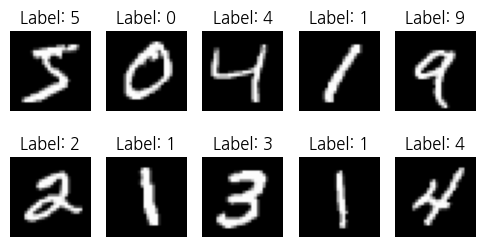

In [ ]:
plt.figure(figsize=(6, 3))
for i in range(10):
    plt.subplot(2, 5, i+1)  # 2행 5열의 서브플롯
    plt.imshow(x_train[i], cmap="gray")  # 흑백 이미지로 표시
    plt.axis("off")  # 축 숨기기
    plt.title(f"Label: {y_train[i]}")
plt.show()

- 흑백 이미지 (Grayscale):
하나의 픽셀 값이 0~255 범위를 가짐.
예: 0(검정) → 127(회색) → 255(흰색).

### 데이터 전처리

📌[실습 04-13] 스케일 정규화하기

In [ ]:
x_train=x_train/255; x_test=x_test/255   # 0~1 표준화 데이터전처리
x0=x_train[0,15:19,15:19] # 첫 이미지의 일부 픽셀
print("차원=", x0.shape)
print(x0)

차원= (4, 4)
[[0.72941176 0.99215686 0.99215686 0.58823529]
 [0.0627451  0.36470588 0.98823529 0.99215686]
 [0.         0.         0.97647059 0.99215686]
 [0.50980392 0.71764706 0.99215686 0.99215686]]


flatten 함수 설명

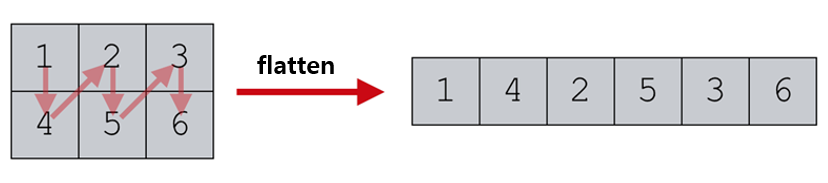

📌[실습 04-14] 랜덤 시드 고정하기

In [ ]:
SEED=42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

📌[실습 04-15] 인공 신경망 기반 이미지 분류 모델 설정하기

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)) )  # input 28 x 28 = 784개의 피쳐 (정규화된 픽셀 값)
model.add(Dense(64, activation='relu') )
model.add(Dense(64, activation='relu') )
model.add(Dense(len(class_names), activation='softmax')) # output, 반드시 softmax 사용, 각 라벨의 확률값
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

📌[실습 04-16] 인공 신경망 기반 이미지 분류 모델 학습하기

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 조기 종료 인스턴스
early_stop=EarlyStopping(
    monitor='val_loss',               # 검증 손실을 모니터링
    patience=5,                       # 5번 연속 개선되지 않으면 멈춤
    restore_best_weights=True )       # 가장 좋은 모델로 파라미터 복원

history=model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), verbose=1, callbacks=[early_stop])


Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8620 - loss: 0.4904 - val_accuracy: 0.9557 - val_loss: 0.1474
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9584 - loss: 0.1353 - val_accuracy: 0.9655 - val_loss: 0.1109
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9719 - loss: 0.0939 - val_accuracy: 0.9696 - val_loss: 0.0987
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9788 - loss: 0.0701 - val_accuracy: 0.9688 - val_loss: 0.1044
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9833 - loss: 0.0559 - val_accuracy: 0.9706 - val_loss: 0.0973
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9863 - loss: 0.0451 - val_accuracy: 0.9692 - val_loss: 0.1062
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9889 - loss: 0.0370 - val_accuracy: 0.9720 - val_loss: 0.1010
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9902 - loss: 0.0321 - 

📌[실습 04-17] 모델의 손실과 정확도 변화 시각화하기

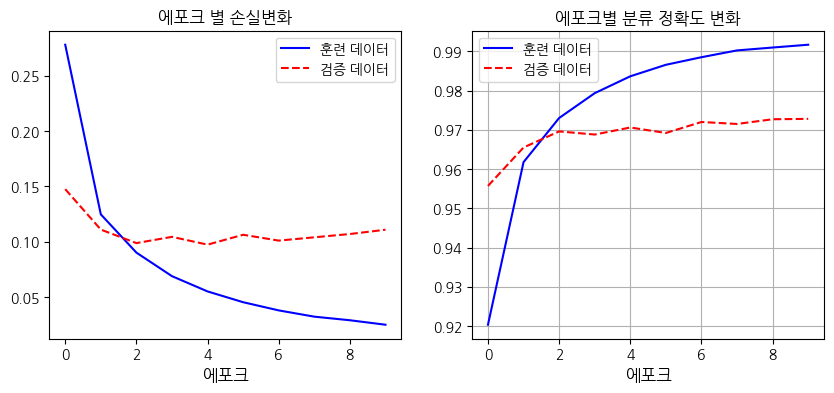

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='훈련 데이터', color='blue', linestyle='-')
plt.plot(history.history['val_loss'], label='검증 데이터', color='red', linestyle='--')
plt.title('에포크 별 손실변화'); plt.xlabel('에포크', fontsize=12); plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='훈련 데이터', color='blue', linestyle='-')
plt.plot(history.history['val_accuracy'], label='검증 데이터', color='red', linestyle='--')
plt.title('에포크별 분류 정확도 변화'); plt.xlabel('에포크', fontsize=12)
plt.legend(); plt.grid(); plt.show()

📌[실습 04-18] 예측 결과 계산하기

In [ ]:
y_pred=model.predict(x_test)
print("y_pred 차원=", y_pred.shape)
y_pred_labels=np.argmax(y_pred, axis=1)  # 예측된 클래스 레이블
print("y_pred_labels 차원=", y_pred_labels.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
y_pred 차원= (10000, 10)
y_pred_labels 차원= (10000,)


📌[실습 04-19] 혼동 행렬로 예측 성능 시각화하기

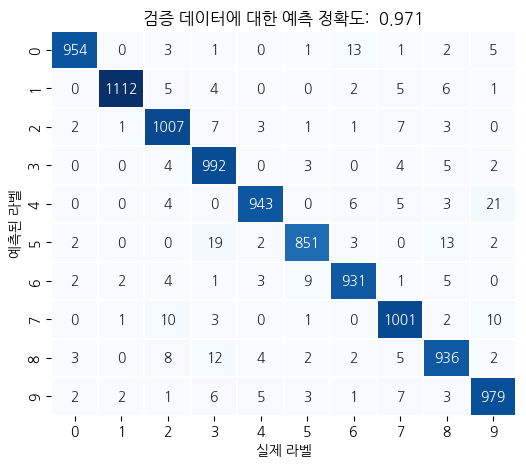

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

# 검증용 데이터셋에 대한 혼동행렬 생성
cm=confusion_matrix(y_test, y_pred_labels)
# 분류 정확도 계산
acc=accuracy_score(y_test, y_pred_labels)

# 혼동행렬 시각화 (이전 코드 재활용)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True,fmt="d", linewidths=0.1, cmap='Blues',cbar=None)
# 타깃이 이미 정수 라벨이므로 눈금(ticks) 이름 별도 지정은 불필요

plt.xlabel('실제 라벨'); plt.ylabel('예측된 라벨')
plt.title(f'검증 데이터에 대한 예측 정확도:  {acc:.3f}')
plt.show()

📌[실습 04-20] 예측 결과와 확률 시각화하기

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


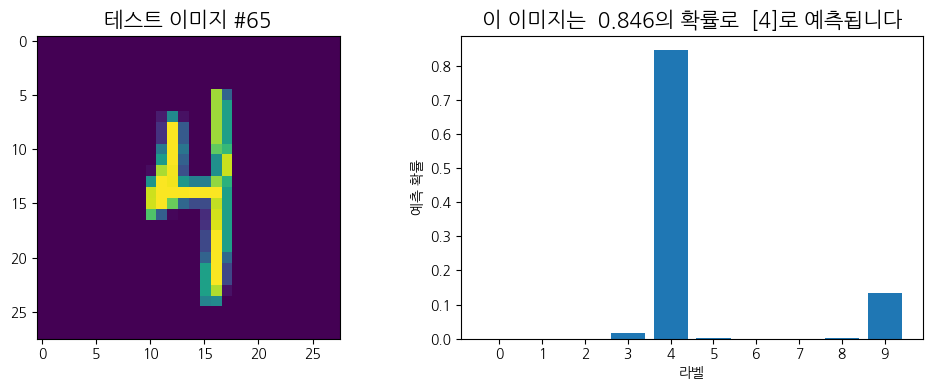

In [ ]:
plt.figure(figsize=(10, 4)) # 그림 크기
k=65  # 예측 이미지 선택

# 첫 번째 서브플롯: 이미지
plt.subplot(1, 2, 1)
plt.imshow(x_test[k])
plt.title(f"테스트 이미지 #{k}", fontsize=15)

pred=model.predict(x_test)[k]  # 예측된 확률 벡터
pred_label=np.argmax(pred)  # 예측된 레이블(가장 높은 확률을 가진 클래스)

max_prob=np.max(pred)

# 두 번째 서브플롯: 예측 확률
plt.subplot(1, 2, 2)
plt.bar(class_names, pred)  # 0~9까지 확률을 막대그래프로
plt.xticks(np.arange(10))  # X축: 0~9
plt.xlabel('라벨')
plt.ylabel('예측 확률')
plt.title(f'이 이미지는 {max_prob: .3f}의 확률로  {[class_names[pred_label]]}로 예측됩니다', fontsize=15)

plt.tight_layout()
plt.show()